# Matplotlib图鉴——基础箱线图

## 公众号：可视化图鉴

In [2]:
import matplotlib
print(matplotlib.__version__) #查看Matplotlib版本
import pandas as pd
print(pd.__version__) #查看pandas版本
import numpy as np
print(np.__version__) #查看numpy版本
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['STHeiti'] #设置中文

3.3.3
1.1.5
1.19.5


注意，代码在以下环境全部通过测试:
- Python 3.7.1
- Matplotlib == 3.3.3
- pandas == 1.2.0
- numpy == 1.19.4

因版本不同，可能会有部分语法差异，如有报错，请先检查拼写及版本是否一致！

### 进阶箱线图

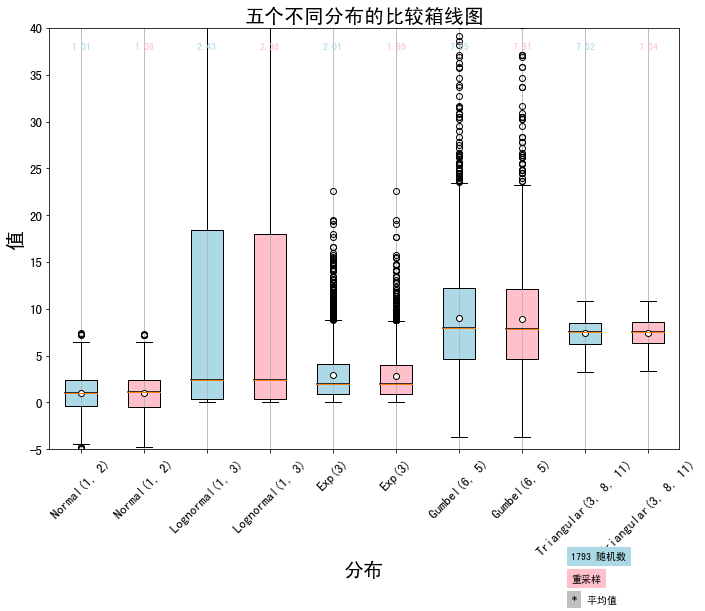

In [4]:
from matplotlib.patches import Polygon

# via https://matplotlib.org/gallery/statistics/boxplot_demo.html?highlight=boxplot
random_dists = ['Normal(1, 2)', 'Lognormal(1, 3)', 'Exp(3)', 'Gumbel(6, 5)',
                'Triangular(3, 8, 11)']
N = 1793

norm = np.random.normal(1, 2, N)
logn = np.random.lognormal(1, 3, N)
expo = np.random.exponential(3, N)
gumb = np.random.gumbel(6, 5, N)
tria = np.random.triangular(3, 8, 11, N)

bootstrap_indices = np.random.randint(0, N, N)
data = [
    norm, norm[bootstrap_indices],
    logn, logn[bootstrap_indices],
    expo, expo[bootstrap_indices],
    gumb, gumb[bootstrap_indices],
    tria, tria[bootstrap_indices],
]

fig, ax1 = plt.subplots(figsize=(10, 9))
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='o', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='o')

#在绘图中添加水平网格
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

#ax1.set(
#    axisbelow=True,  
#    title='五个不同分布的比较箱线图',
#    xlabel='分布',
#    ylabel='值'
#)

box_colors = ['lightblue', 'pink']
num_boxes = len(data)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    box_x = []
    box_y = []
    for j in range(5):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    box_coords = np.column_stack([box_x, box_y])

    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    
    med = bp['medians'][i]
    median_x = []
    median_y = []
    for j in range(2):
        median_x.append(med.get_xdata()[j])
        median_y.append(med.get_ydata()[j])
        ax1.plot(median_x, median_y, 'k')
    medians[i] = median_y[0]

    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='o', markeredgecolor='k')

# 设置轴范围和轴标签
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(np.repeat(random_dists, 2),
                    rotation=45, fontsize=8)

# 两位小数精确
pos = np.arange(num_boxes) + 1
upper_labels = [str(round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='medium',
             weight=weights[k], color=box_colors[k])
        
fig.text(0.80, 0.08, f'{N} 随机数',
         backgroundcolor=box_colors[0], color='black', weight='roman',
         size='medium')
fig.text(0.80, 0.045, '重采样',
         backgroundcolor=box_colors[1],
         color='black', weight='roman', size='medium')
fig.text(0.80, 0.015, '*', color='black', backgroundcolor='silver',
         weight='roman', size='medium')
fig.text(0.815, 0.013, ' 平均值', color='black', weight='roman',
         size='medium')

plt.xlabel("分布", fontsize = 20)
plt.ylabel("值", fontsize = 20)
plt.title('五个不同分布的比较箱线图', fontsize = 20)

plt.tick_params(labelsize=13)
plt.grid()

plt.show()
